<img src="Capture.jpg">

## <font color=red>Task 2 :  To Explore Supervised Machine Learning</font>

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Simple Linear Regression :
### Objectives : 
<font color=GREEN>**1. In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple regression task as it involves just two variables.**</font>

<font color=GREEN>**2. We need to find out what will be the predicted score if a student studies for 9.25 hours in a day .**</font>


In [1]:
# Importing filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
# Reading the dataset into 'data' dataframe
data=pd.read_csv('http://bit.ly/w-data')
print("Dataset Imported Successfully")
data.head()

Dataset Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [4]:
#Finding out the datatype of the columns in the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# looking at the shape of the dataset
data.shape

(25, 2)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# To check if there are any missing values in the dataset

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**<font color= Purple>We see there are no missing values in our dataset.</font>**

### Visualizing the data:

### Checking for the Linearity assumption

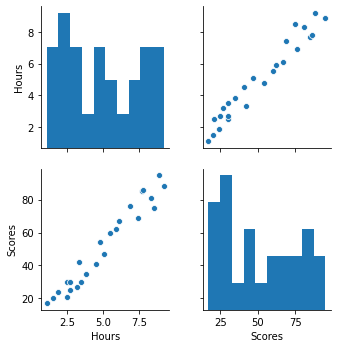

In [8]:
sns.pairplot(data)

**<font color= Purple>We see that there is linear relationship between 'Scores' and 'Hours'. So our assumption of Linearity for linear regession is verified. </font>**

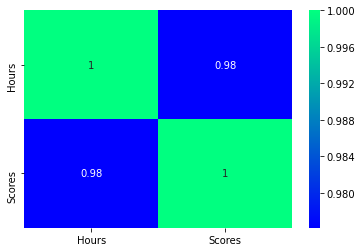

In [9]:
# Looking at the correlations between variables
sns.heatmap(data.corr(),annot=True,cmap='winter')

**<font color= Purple>We see that  'Scores' and 'Hours' have a high correlation of 0.98.</font>**

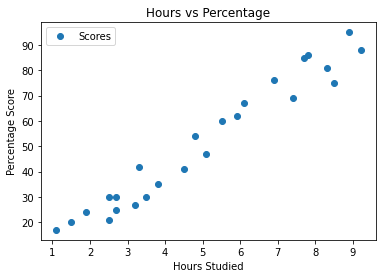

In [10]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**<font color=purple>From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**</font>

---
## Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature<br>


In our case:

$Scores = c + m_1 \times Hours$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Preparing the data

**We first assign the feature variable 'Hours' to the variable X and the response variable, Score, to the variable y**

#### Creating x and y 

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#### Splitting the Data into Training and Testing Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

#### Training our model on the training set


In [13]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lm.intercept_)
print(lm.coef_)

2.370815382341881
[9.78856669]


**<font color= Purple>So our Linear Regression Model equation is:</font>**
    
**<font color= Red>$ Scores = 2.3708 + 9.788* Hours $</font>**

#### Visualizing the actual datapoints and the fitted linear regression line.

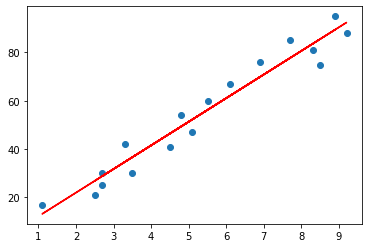

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train,2.3708 + 9.788 * X_train,'r')
plt.show()

#### Making Predictions on the train data

In [16]:
y_train_pred = lm.predict(X_train) 

### Residual analysis 
To validate assumptions of the model, and hence the reliability for inference.

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), for this we plot the histogram of the error terms and see what it looks like.

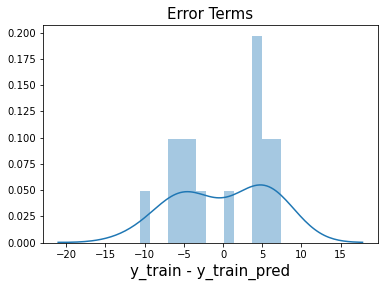

In [17]:
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

**<font color= Purple>Since the errors terms are normally distributed with mean=0, thus our assumption for linear regression is satisfied in our model.</font>**

#### Looking for patterns in the residuals

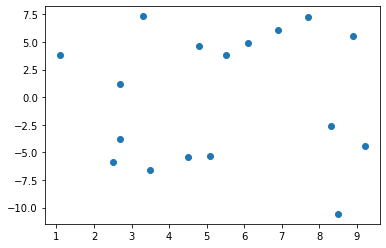

In [18]:
plt.scatter(X_train,res)
plt.show()

**<font color= Purple>Since we are not able to identify any pattern in the error terms , we can verify the assumption of the linear regression that the error terms are independent of each other . So we can say that the model fit isn't by chance, and has decent predictive power.</font>**

**<font color= Purple>So this model fit looks good.</font>**

## Making Predictions on the Test Set

In [19]:
y_pred = lm.predict(X_test)

In [20]:
# Comparing Actual vs Predicted values 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Visualizing the fit on the test set

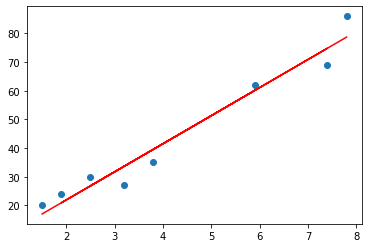

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 2.3708 + 9.788 * X_test, 'r')
plt.show()

### MODEL EVALUATION : 

In [22]:
# i. Looking at the RMSE and MAE
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))

# ii. Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
print('R-Squared : ',r_squared)

# iii. Checking the Adjusted R-squared on the test set
n = X_test.shape[0]      # n is number of rows in X_test
p = X_test.shape[1]     # p= Number of features/predictors which is number of columns in X_test

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
print('Adjusted R- Squared : ',adjusted_r2)



Root Mean Squared Error :  4.792191274636315
Mean Absolute Error :  4.419727808027652
R-Squared :  0.9568211104435257
Adjusted R- Squared :  0.9496246288507799


**<font color= Purple>Looking at these metrics , we can say that our model is a good model as the R-Squared is equal to 95.6 % .</font>**

### Finding out what will be the predicted score if a student studies for 9.25 hours in a day . 

In [23]:
# You can also test with your own data
hours = 9.25
own_pred = lm.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


**<font color= Purple>So if a student studies for 9.25 hours in a day , then predicted score (in percentage) for him would be 92.9 % .</font>**